<a href="https://colab.research.google.com/github/AlicasticAnhthu/Name_Popularity/blob/main/Assignment_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Complete the following tasks for Assignment 1 file. The dataset is Files->Assignment 1->names.zip

1. Download the dataset, read all files, and store the data in data.csv. The data format should include name, gender, counter, and year column.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import glob

# Path to the folder containing the data files
file_paths = glob.glob('/content/drive/MyDrive/Colab Notebooks/names/*.txt')

# Column names for the dataset
columns = ["Name", "Gender", "Counter"]

# List to store all the dataframes from different files
dataframes = []

# Loop through each file and process the contents
for file_path in file_paths:
    # Extract the year from the file name
    year = int(file_path.split('yob')[1].split('.txt')[0])

    # Read the file into a dataframe and assign column names
    df = pd.read_csv(file_path, names=columns)

    # Add a new 'Year' column
    df['Year'] = year

    # Append the dataframe to the list
    dataframes.append(df)

# Combine all dataframes into a single dataframe
combined_df = pd.concat(dataframes, ignore_index=True)

# Save the combined dataframe to a CSV file
combined_df.to_csv('data.csv', index=False)
print(combined_df.head()) #Preview result

        Name Gender  Counter  Year
0       Mary      F     6919  1881
1       Anna      F     2698  1881
2       Emma      F     2034  1881
3  Elizabeth      F     1852  1881
4   Margaret      F     1658  1881


2. Write code to find unique names for male, female, and gender neutral(names which are in both male and female categories).

Sample output:-

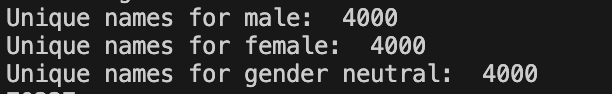

In [ ]:
import pandas as pd

# Load the combined data from the CSV file
data = pd.read_csv('data.csv')  # Adjust the path as needed

# Display the first few rows to ensure it's loaded correctly
data.head()

# Separate names by gender
male_names = set(data[data['Gender'] == 'M']['Name'])
female_names = set(data[data['Gender'] == 'F']['Name'])

# Identify unique male and female names
unique_male_names = male_names - female_names
unique_female_names = female_names - male_names

# Identify gender neutral names (appearing in both categories)
gender_neutral_names = male_names & female_names

# Display the number of unique male, female names and gender neutral names
print(f"Unique male names: {len(unique_male_names)}")
print(f"Unique female names: {len(unique_female_names)}")
print(f"Unique gender-neutral names: {len(gender_neutral_names)}")

Unique male names: 32222
Unique female names: 58794
Unique gender-neutral names: 11433


3. Write code to find top 10 male and female names from 1900-2000.

In [ ]:
import pandas as pd

# Load the dataset (adjust the path to your data file if needed)
df = pd.read_csv('data.csv')

# Filter the data for the years 1900 to 2000
df_filtered = df[(df['Year'] >= 1900) & (df['Year'] <= 2000)].copy()

# Convert the 'Counter' column to integer for summation
df_filtered.loc[:, 'Counter'] = df_filtered['Counter'].astype(int)

# Group by 'Name' and 'Gender', and sum the occurrences (Counter)
grouped = df_filtered.groupby(['Name', 'Gender'], as_index=False).agg({'Counter': 'sum'})

# Separate the male and female data
male_names = grouped[grouped['Gender'] == 'M']
female_names = grouped[grouped['Gender'] == 'F']

# Find the top 10 male names by sorting based on the 'Counter' column
top_10_male = male_names.sort_values(by='Counter', ascending=False).head(10)

# Find the top 10 female names by sorting based on the 'Counter' column
top_10_female = female_names.sort_values(by='Counter', ascending=False).head(10)

# Display the top 10 male and female names
print("Top 10 Male Names (1900-2000):")
print(top_10_male)

print("\nTop 10 Female Names (1900-2000):")
print(top_10_female)

Top 10 Male Names (1900-2000):
          Name Gender  Counter
31145    James      M  4788511
34379     John      M  4719867
60272   Robert      M  4619554
50712  Michael      M  4002743
76252  William      M  3640759
17007    David      M  3339135
59912  Richard      M  2483940
35018   Joseph      M  2280039
12152  Charles      M  2178203
71256   Thomas      M  2114469

Top 10 Female Names (1900-2000):
            Name Gender  Counter
49013       Mary      F  3839818
56434   Patricia      F  1560336
44668      Linda      F  1441020
7156     Barbara      F  1422822
33105   Jennifer      F  1398694
22163  Elizabeth      F  1375407
47862   Margaret      F  1150719
68093      Susan      F  1107578
20597    Dorothy      F  1088944
7972       Betty      F   992217


4. Write code to find top 20 gender neutral name in lexiographic order with more that 10,000 records of each gender.


Sample output:-

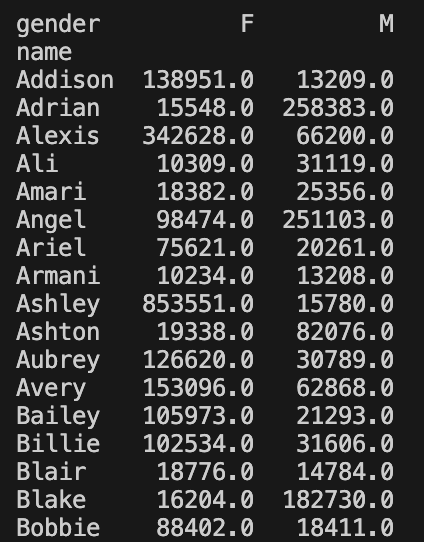

In [ ]:
import pandas as pd

# Load the dataset (adjust the path to your data file if needed)
df = pd.read_csv('data.csv')

# Convert the 'Counter' column to integer for summation
df['Counter'] = df['Counter'].astype(int)

# Group by 'Name' and 'Gender', summing the 'Counter' column for each name-gender combination
grouped = df.groupby(['Name', 'Gender'], as_index=False).agg({'Counter': 'sum'})

# Pivot the table to have one row per name, with separate columns for male and female counts
pivot = grouped.pivot_table(index='Name', columns='Gender', values='Counter', fill_value=0)

# Filter to keep only names that appear in both genders with more than 10,000 occurrences each
gender_neutral = pivot[(pivot['M'] > 10000) & (pivot['F'] > 10000)]

# Sort names lexicographically (alphabetical order)
gender_neutral_sorted = gender_neutral.sort_index()

# Get the top 20 gender-neutral names
top_20_gender_neutral = gender_neutral_sorted.head(20)

# Display the top 20 gender-neutral names
print("Top 20 Gender-Neutral Names (more than 10,000 records for each gender):")
print(top_20_gender_neutral)

Top 20 Gender-Neutral Names (more than 10,000 records for each gender):
Gender          F         M
Name                       
Addison  138951.0   13209.0
Adrian    15548.0  258383.0
Alexis   342628.0   66200.0
Ali       10309.0   31119.0
Amari     18382.0   25356.0
Angel     98474.0  251103.0
Ariel     75621.0   20261.0
Armani    10234.0   13208.0
Ashley   853551.0   15780.0
Ashton    19338.0   82076.0
Aubrey   126620.0   30789.0
Avery    153096.0   62868.0
Bailey   105973.0   21293.0
Billie   102534.0   31606.0
Blair     18776.0   14784.0
Blake     16204.0  182730.0
Bobbie    88402.0   18411.0
Cameron   30331.0  298287.0
Carey     12736.0   16833.0
Carmen   140499.0   16723.0


5. Plot the graph of top 10 trending names in last 10 years.

Sample Graph:-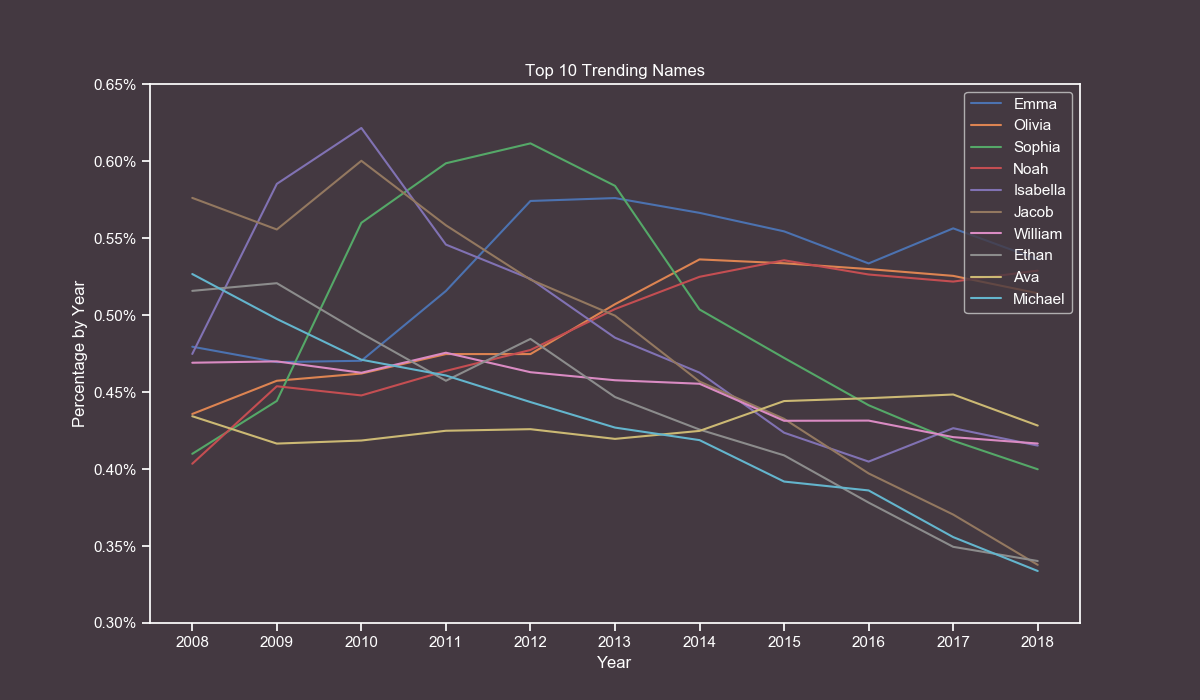

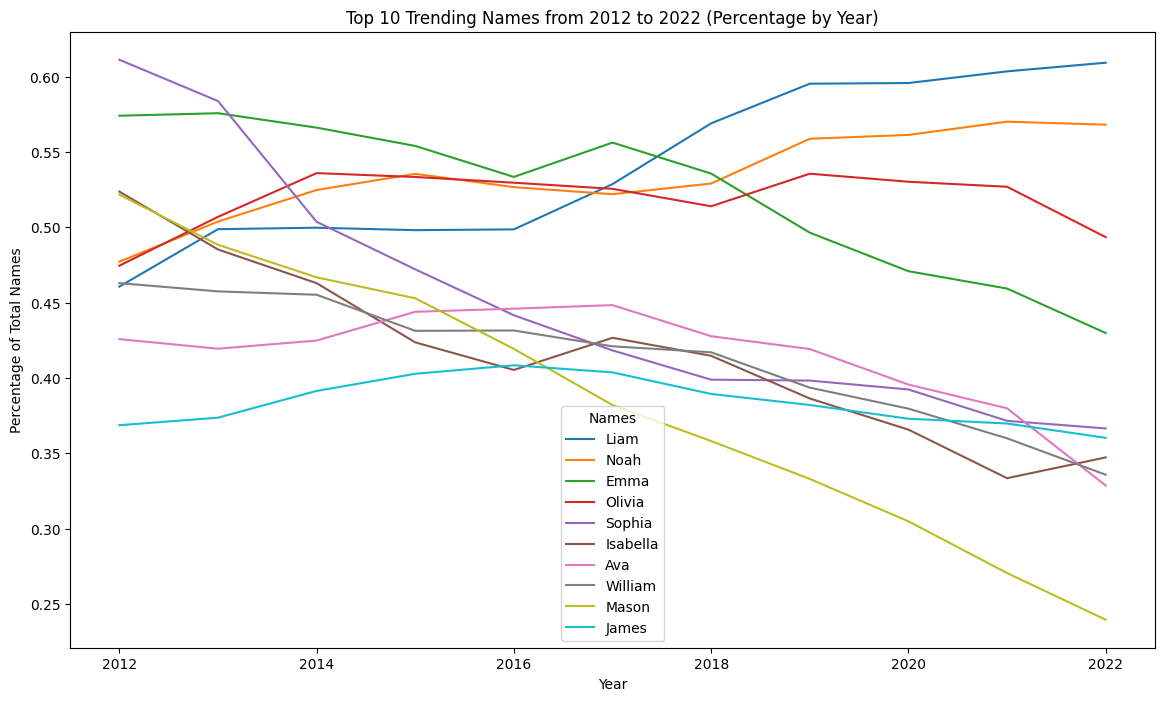

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

# Filter the dataset for the last 10 years
recent_data = data[data['Year'].between(2012, 2022)]

# Group by name and sum up the counters to find the most popular names
top_names = recent_data.groupby('Name')['Counter'].sum().nlargest(10)

# Filter the dataset to include only the top 10 names
filtered_data = recent_data[recent_data['Name'].isin(top_names.index)]

# Pivot the data for plotting
pivot_data = filtered_data.pivot_table(index='Year', columns='Name', values='Counter', aggfunc='sum')

# Fill missing values to ensure all names have data for each year in the range
pivot_data = pivot_data.fillna(0)

# Calculate the total occurrences per year
total_per_year = recent_data.groupby('Year')['Counter'].sum()

# Calculate the percentage for each name per year
pivot_data_percent = pivot_data.divide(total_per_year, axis=0) * 100

# Plotting the percentage trends of the top 10 names over the last 10 years
plt.figure(figsize=(14, 8))
for name in top_names.index:
    if name in pivot_data_percent.columns:  # Check if the name exists in the columns before plotting
        plt.plot(pivot_data_percent.index, pivot_data_percent[name], label=name)

plt.title('Top 10 Trending Names from 2012 to 2022 (Percentage by Year)')
plt.xlabel('Year')
plt.ylabel('Percentage of Total Names')
plt.legend(title='Names')
plt.show()

6. Plot the graph of total birth by sex and year and write the observation from the graph.

Sample Graph:-
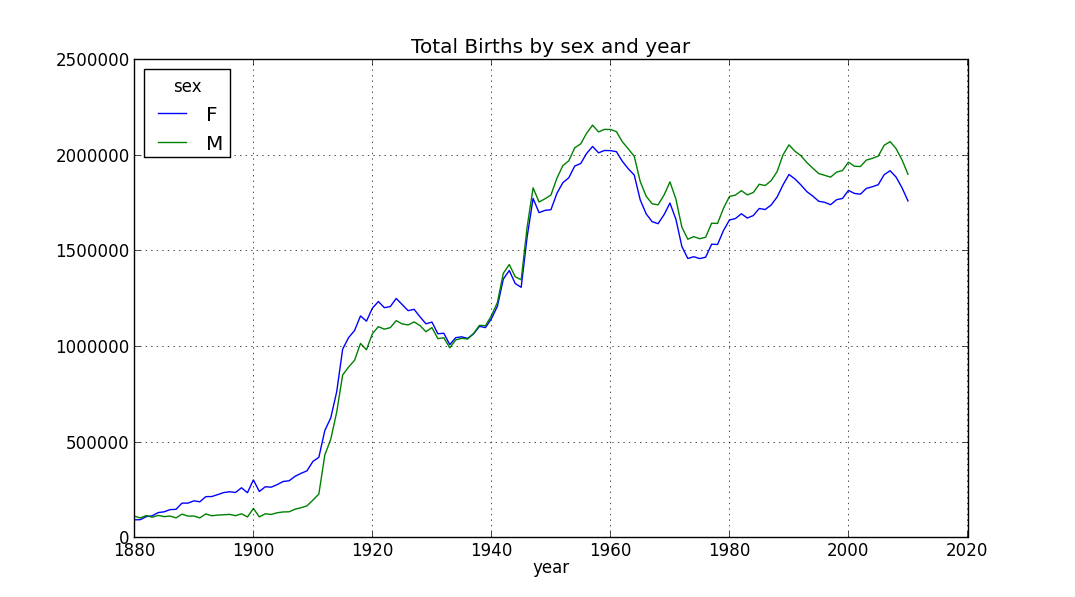

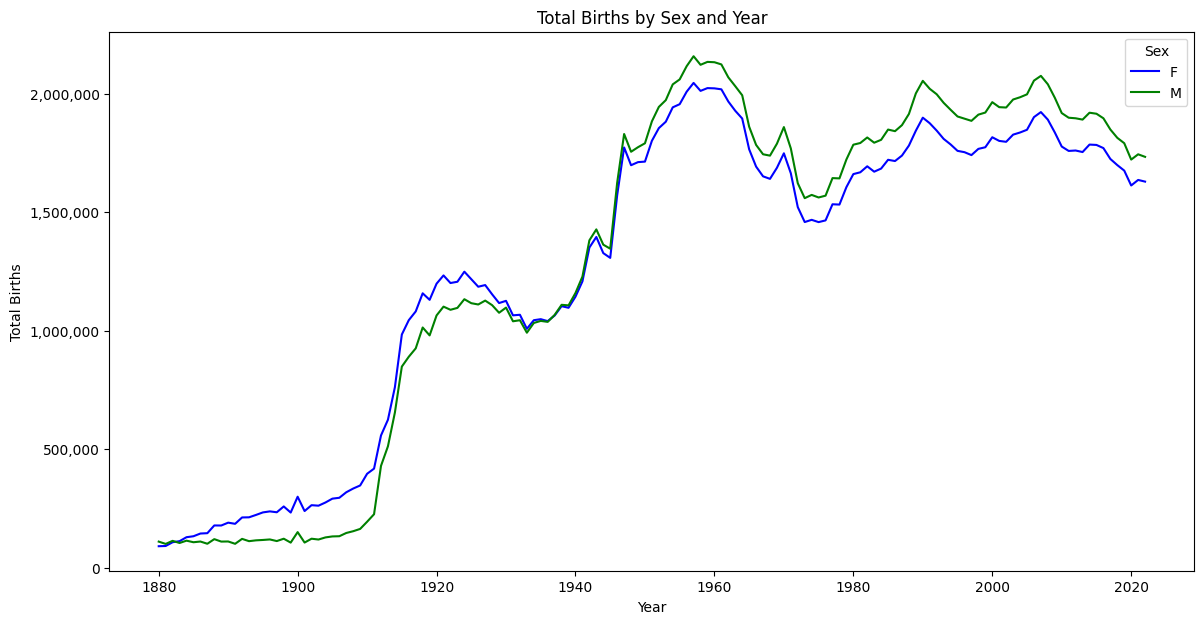

In [ ]:
import matplotlib.pyplot as plt

# Group by year and gender and sum the counts
grouped_data = data.groupby(['Year', 'Gender']).sum().reset_index()

# Pivot the data to get years as rows and genders as columns
pivot_data = grouped_data.pivot(index='Year', columns='Gender', values='Counter')

# Plotting
plt.figure(figsize=(14, 7))
plt.plot(pivot_data.index, pivot_data['F'], label='F', color='blue')
plt.plot(pivot_data.index, pivot_data['M'], label='M', color='green')
plt.title('Total Births by Sex and Year')
plt.xlabel('Year')
plt.ylabel('Total Births')
plt.legend(title='Sex')
plt.gca().get_yaxis().set_major_formatter(plt.FuncFormatter(lambda x, loc: "{:,}".format(int(x))))
plt.show()


7. Draw the graph of popular male and female baby names in 50% percentile. Write the observation from the graph.

Sample Graph:-

x-axis: year

y-axis: number of popular names in top 50%

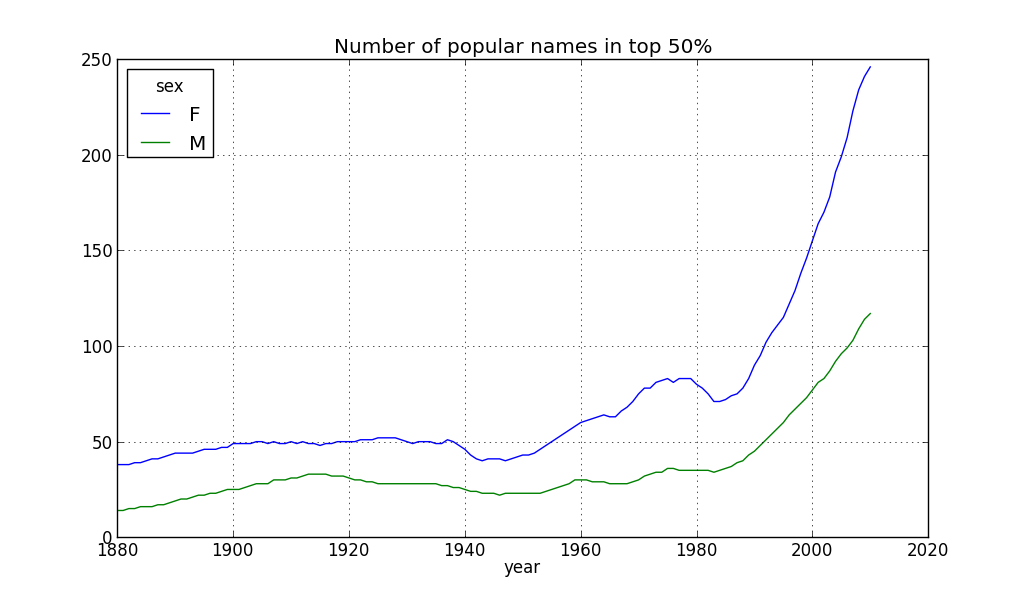

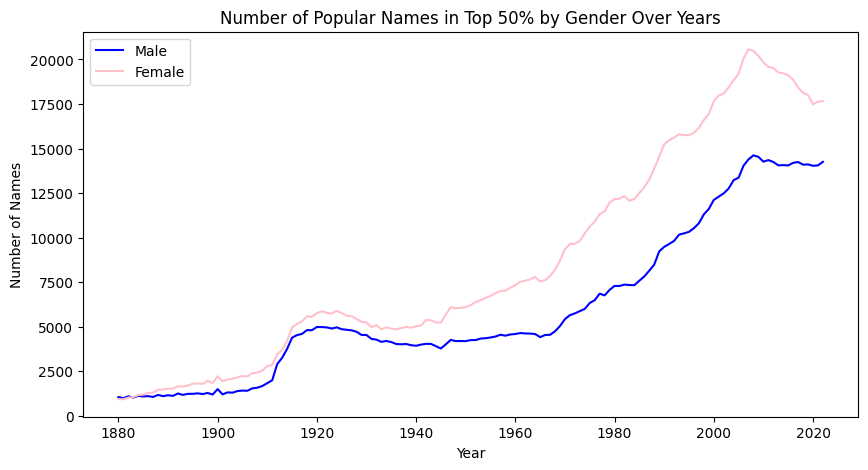

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the data
file_path = 'data.csv'
data = pd.read_csv(file_path)

# Filter and count the data
def count_top_50_percent_names(data, gender):
    # Filter data by gender
    gender_data = data[data['Gender'] == gender]

    # Count the number of unique names per year
    count_names = gender_data.groupby('Year').size()

    return count_names

# Get data for each gender
male_names_count = count_top_50_percent_names(data, 'M')
female_names_count = count_top_50_percent_names(data, 'F')

# Plotting the data
plt.figure(figsize=(10, 5))
plt.plot(male_names_count.index, male_names_count, label='Male', color='blue')
plt.plot(female_names_count.index, female_names_count, label='Female', color='pink')

# Adding titles and labels
plt.title('Number of Popular Names in Top 50% by Gender Over Years')
plt.xlabel('Year')
plt.ylabel('Number of Names')
plt.legend()
plt.show()


8. Draw the graph of number of birth per year for Alice, Mary, Sadie and Victoria. Write the observation from the graph.

Sample Graph:-

x-axis: Year

y-axis: number of birth

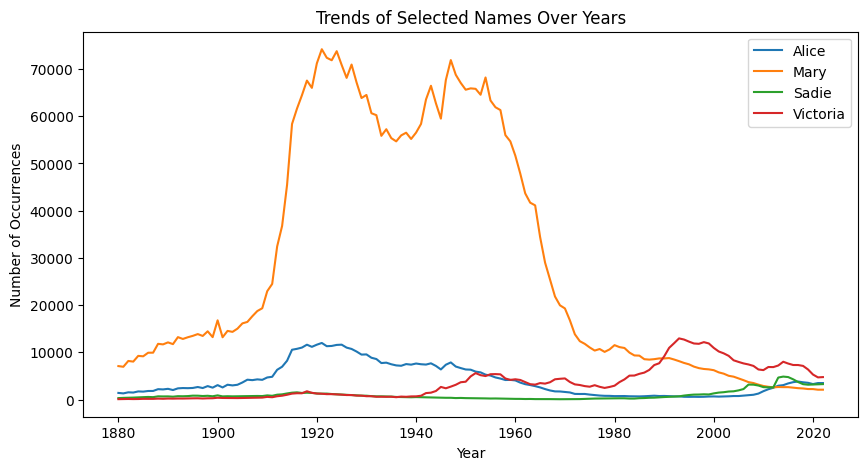

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the data
file_path = 'data.csv'
data = pd.read_csv(file_path)

# Filter the data for the names you are interested in
filtered_data = data[data['Name'].isin(['Alice', 'Mary', 'Sadie', 'Victoria'])]

# Pivot the data to get years as index and names as columns with their counts
pivoted_data = filtered_data.pivot_table(index='Year', columns='Name', values='Counter', aggfunc='sum')

# Plotting the data
plt.figure(figsize=(10, 5))
for name in ['Alice', 'Mary', 'Sadie', 'Victoria']:
    plt.plot(pivoted_data[name], label=name)  # Plot each name

# Adding titles and labels
plt.title('Trends of Selected Names Over Years')
plt.xlabel('Year')
plt.ylabel('Number of Occurrences')
plt.legend()
plt.show()

9. Plot the graph of the first letter proportion in Male and Female baby name for 1900, 1910, 2000, 2010.

Sample Graph:-
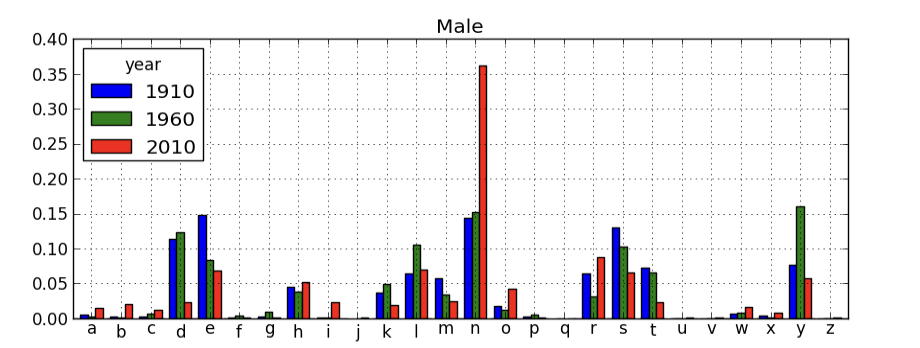

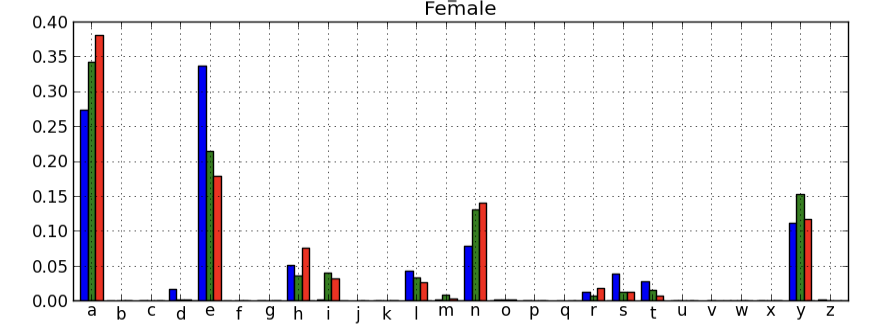

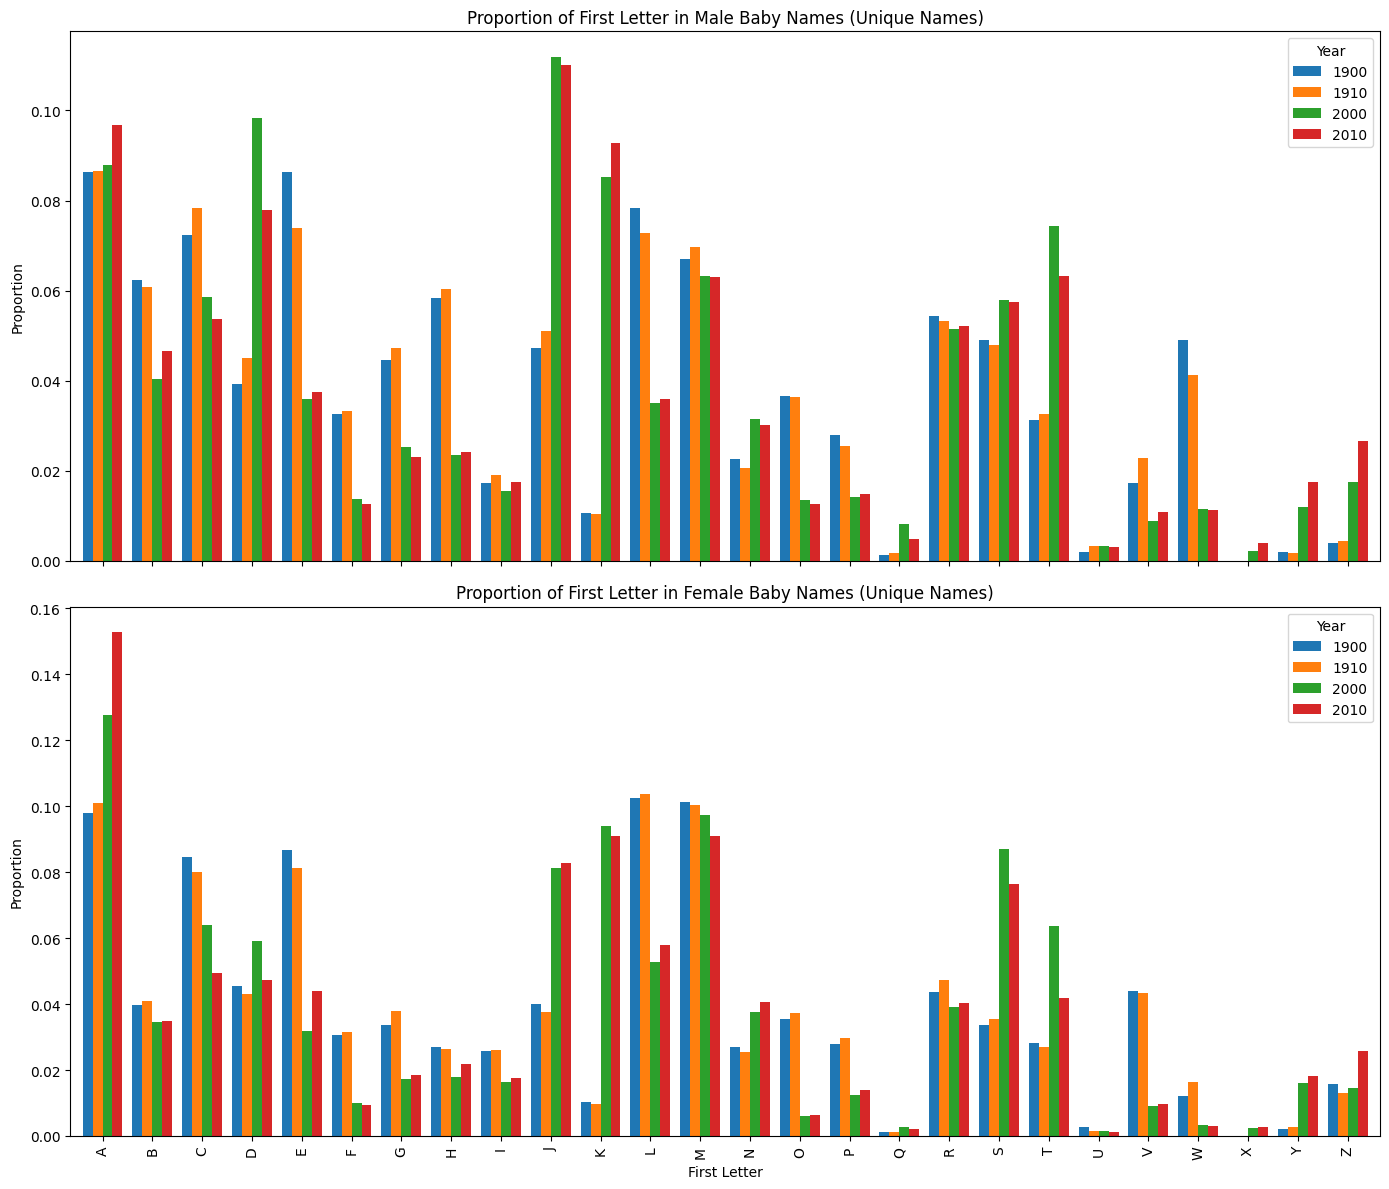

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the data from the uploaded CSV file
file_path = 'data.csv'
data = pd.read_csv(file_path)

# Extract the first letter from each name
data['FirstLetter'] = data['Name'].apply(lambda x: x[0].upper())

# Filter data for the specified years
selected_years = [1900, 1910, 2000, 2010]
filtered_data = data[data['Year'].isin(selected_years)]

# Dropping duplicates to ensure each name contributes only once per year
filtered_data = filtered_data.drop_duplicates(subset=['Name', 'Year', 'Gender'])

# Group by Gender, FirstLetter, and Year, then count the occurrences
grouped_data = filtered_data.groupby(['Gender', 'FirstLetter', 'Year']).size().reset_index(name='Count')

# Calculate the total number of names per Gender and Year for normalization
total_counts = filtered_data.groupby(['Gender', 'Year']).size().reset_index(name='Total')

# Merge to get total counts in the main dataframe
grouped_data = grouped_data.merge(total_counts, on=['Gender', 'Year'])

# Calculate the proportion of each first letter
grouped_data['Proportion'] = grouped_data['Count'] / grouped_data['Total']

# Pivot the table to have years as columns
pivot_male = grouped_data[grouped_data['Gender'] == 'M'].pivot(index='FirstLetter', columns='Year', values='Proportion')
pivot_female = grouped_data[grouped_data['Gender'] == 'F'].pivot(index='FirstLetter', columns='Year', values='Proportion')

# Plotting
fig, axes = plt.subplots(2, 1, figsize=(14, 12), sharex=True)
pivot_male.plot(ax=axes[0], kind='bar', width=0.8)
pivot_female.plot(ax=axes[1], kind='bar', width=0.8)

axes[0].set_title('Proportion of First Letter in Male Baby Names (Unique Names)')
axes[0].set_xlabel('First Letter')
axes[0].set_ylabel('Proportion')
axes[0].legend(title='Year')

axes[1].set_title('Proportion of First Letter in Female Baby Names (Unique Names)')
axes[1].set_xlabel('First Letter')
axes[1].set_ylabel('Proportion')
axes[1].legend(title='Year')

plt.tight_layout()
plt.show()


10. Plot the graph of the Male and Female baby name whose letter startes with "A", "P" and "T" over the 60 year interval from 1880 as starting year.

Sample graph:-

2 Graphs, 1 for Male and another for Female

x-axis: year

y-axis: count of baby name

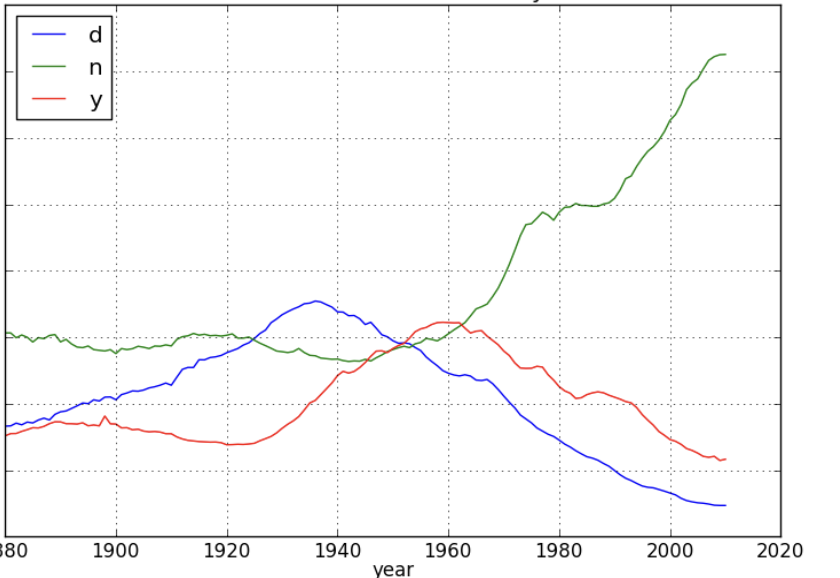

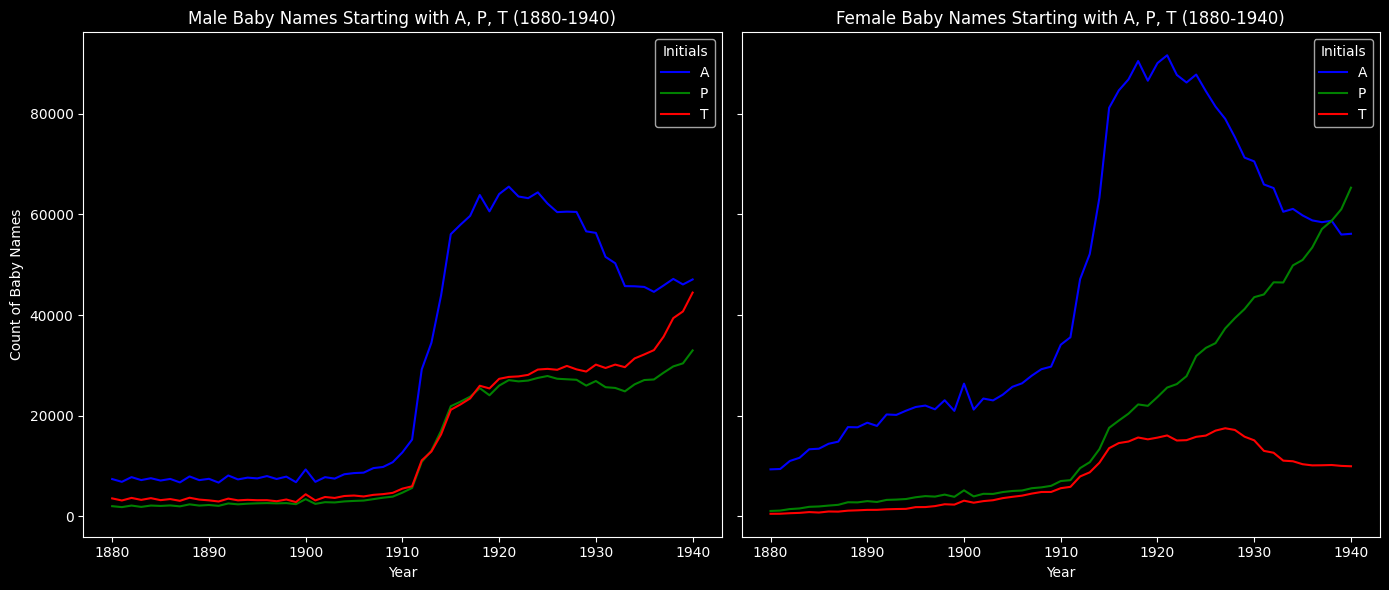

In [ ]:
# Filter the data for the years 1880 to 1940 and names starting with 'A', 'P', 'T'
a_names = data[(data['Year'] >= 1880) & (data['Year'] <= 1940) & data['Name'].str.startswith('A')]
p_names = data[(data['Year'] >= 1880) & (data['Year'] <= 1940) & data['Name'].str.startswith('P')]
t_names = data[(data['Year'] >= 1880) & (data['Year'] <= 1940) & data['Name'].str.startswith('T')]

# Group by year and gender, then sum up the counts for each letter
a_grouped = a_names.groupby(['Year', 'Gender'])['Counter'].sum().unstack()
p_grouped = p_names.groupby(['Year', 'Gender'])['Counter'].sum().unstack()
t_grouped = t_names.groupby(['Year', 'Gender'])['Counter'].sum().unstack()

# Plotting the data for each gender and letter
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(14, 6), sharey=True)

# Plot for Male Names
axes[0].plot(a_grouped.index, a_grouped['M'], label='A', color='blue')
axes[0].plot(p_grouped.index, p_grouped['M'], label='P', color='green')
axes[0].plot(t_grouped.index, t_grouped['M'], label='T', color='red')
axes[0].set_title('Male Baby Names Starting with A, P, T (1880-1940)')
axes[0].set_xlabel('Year')
axes[0].set_ylabel('Count of Baby Names')
axes[0].legend(title='Initials')

# Plot for Female Names
axes[1].plot(a_grouped.index, a_grouped['F'], label='A', color='blue')
axes[1].plot(p_grouped.index, p_grouped['F'], label='P', color='green')
axes[1].plot(t_grouped.index, t_grouped['F'], label='T', color='red')
axes[1].set_title('Female Baby Names Starting with A, P, T (1880-1940)')
axes[1].set_xlabel('Year')
axes[1].legend(title='Initials')

plt.tight_layout()
plt.show()